In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import joblib


In [2]:
import pandas as pd
import sys
sys.path.append('c:/users/shubh/programming_work/virtual_envs/genai_exp_env/lib/site-packages')


In [3]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [4]:
df_final_aggregated = pd.read_csv("df_final_aggregated.csv")

In [5]:
comment_categories = [

    "Humor and Memes",
    "Appreciation and Praise",
    "Words of empathy",
    "Personal Stories and Experiences"    
]

In [6]:
lyric_categories = [

    "Love and Relationships",
    "Self-Reflection and Personal Struggles",
    "Social and Political Themes",
    "Celebration and Fun",
    "Philosophical and Existential",
    "Storytelling and Narrative",
    "Escape and Fantasy",
    "Spiritual and Relgious",
    "Cultural and Lifestyle",
    "Fun and Humor"
]

In [7]:
spotify_attributes = [
    # "spotify_id",
    "Danceability",	
    "Energy",	
    "Key",	
    "Loudness",	
    "Speechiness",	
    "Acousticness",	
    "Instrumentalness",	
    "Liveness",	
    "Valence",	
    "Tempo",	
    "Duration_ms"

    
]

In [8]:
for col in df_final_aggregated.columns:
    print(col)

Unnamed: 0
spotify_id
Love and Relationships
Self-Reflection and Personal Struggles
Social and Political Themes
Celebration and Fun
Philosophical and Existential
Storytelling and Narrative
Escape and Fantasy
Spiritual and Religious
Cultural and Lifestyle
Fun and Humor
Humor and Memes
Appreciation and Praise
Words of encouragement
Words of empathy
Personal Stories and Experiences
Nostalgia and Memories
Artist
Url_spotify
Track
Album
Album_type
Uri
Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Url_youtube
Title
id
lyrics
youtube_video_id
video_id


In [9]:
X = df_final_aggregated[ comment_categories ]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

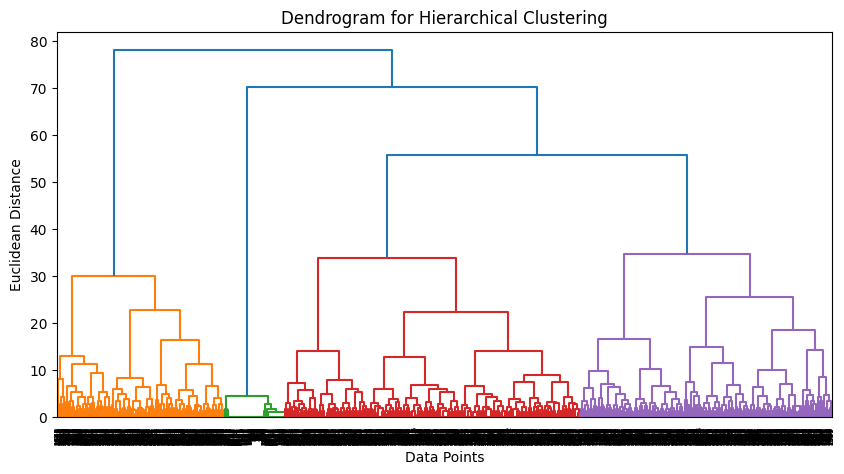

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Assume X_scaled is the preprocessed data

# Plot Dendrogram to determine optimal clusters
plt.figure(figsize=(10, 5))
linkage_matrix = sch.linkage(X_scaled, method='ward')
sch.dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()



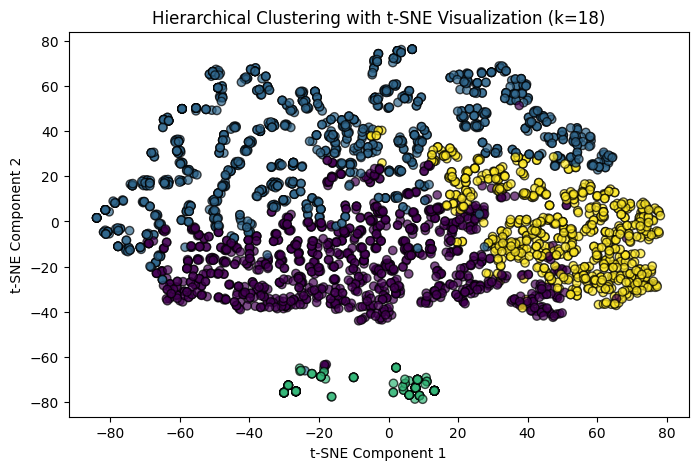

In [12]:
# Perform Hierarchical Clustering with k=18
n_clusters = 4
agglo = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = agglo.fit_predict(X_scaled)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the clustered data using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Hierarchical Clustering with t-SNE Visualization (k=18)')
plt.show()

In [13]:
X_scaled_df = pd.DataFrame(X_scaled, columns = comment_categories )
X_scaled_df['cluster'] = labels

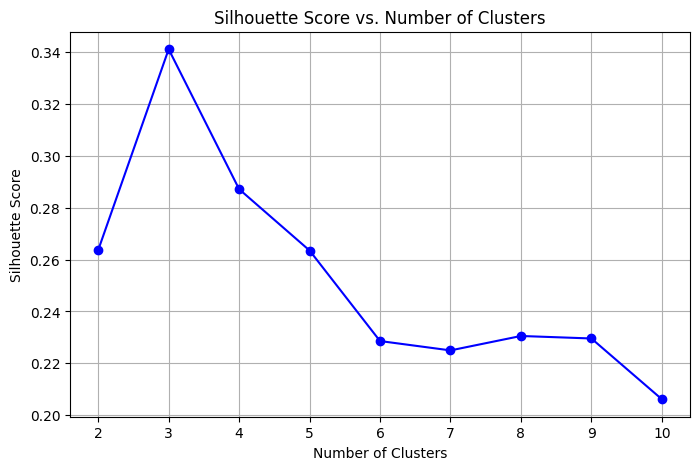

In [14]:
# Define range of cluster sizes to evaluate
cluster_range = range(2, 11)  # Varying from 2 to 10 clusters
silhouette_scores = []

# Compute silhouette score for different cluster sizes
for n_clusters in cluster_range:
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agg_cluster.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()

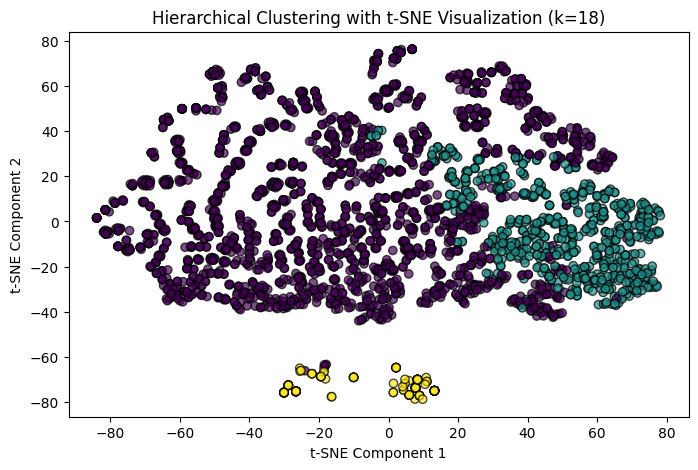

In [15]:
# Perform Hierarchical Clustering with k=18
n_clusters = 3
agglo = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = agglo.fit_predict(X_scaled)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the clustered data using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Hierarchical Clustering with t-SNE Visualization (k=18)')
plt.show()

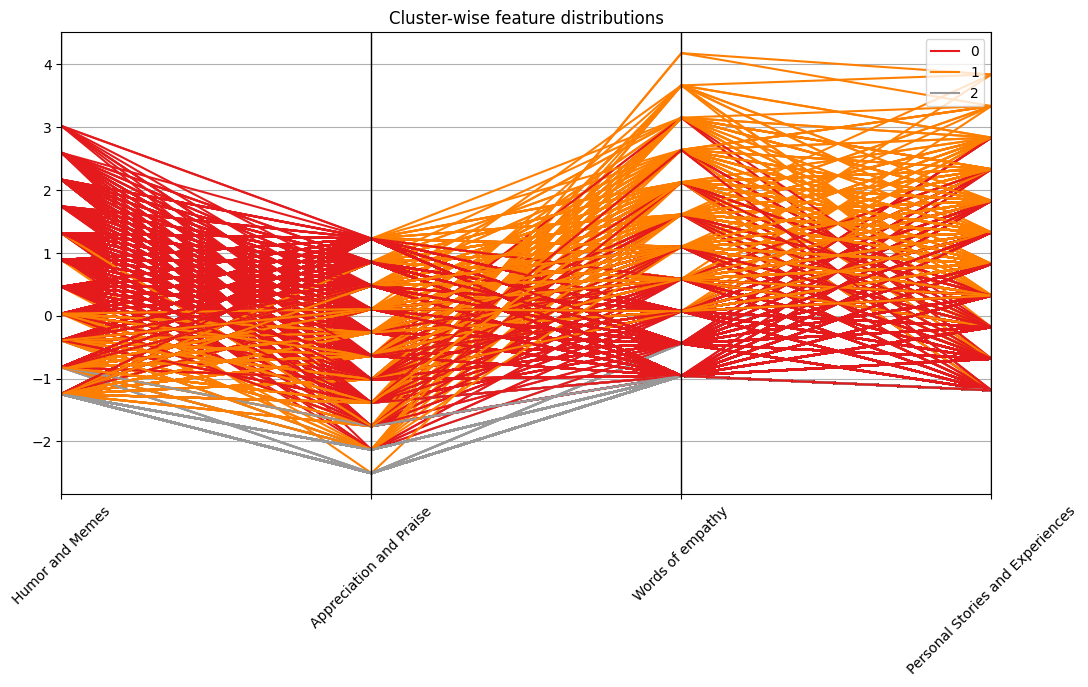

In [16]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
X_scaled_df = pd.DataFrame(X_scaled, columns = comment_categories )
X_scaled_df['cluster'] = labels
plt.figure(figsize=(12,6))
parallel_coordinates(X_scaled_df, class_column="cluster", cols=comment_categories, colormap=plt.get_cmap("Set1"))
# plt.title("Parallel Coordinates Plot of Clusters")
plt.title("Cluster-wise feature distributions")
plt.xticks(rotation=45)

# Save as JPG
plt.savefig("parallel_coordinates_plot_comments.jpg", format="jpg", dpi=300, bbox_inches="tight")


plt.show()

In [17]:
len(X_scaled_df[ X_scaled_df['cluster'] == 2 ])

252

### OBSERVATION

- cluster 0 represents higher concentration of Humor and Memes related comments.
- cluster 3 represents higher concentration of 'Words of empathy' (deeply emotional) related comments as well 'Personal Stories and Experiences'.
- cluster 1 represents a more spread-out distribution of all types of comments but has relatively higher concentration of 'Appreciation and Praise' related comments
- cluster 2 represents all records which have relatively lower concentrations of all types of comments.

It makes sense for records with 'Personal Stories and Expereinces' as well 'Deeply Emotional' contents getting clubbed into the same cluster - cluster 3.


### OBSERVATIONs for 3 CLUSTERs

- cluster 0 represents higher concentration of Humor and Memes related comments.
- cluster 1 represents higher concentration of 'Words of empathy' (deeply emotional) related comments as well 'Personal Stories and Experiences'.
- cluster 2 represents all records which have relatively lower concentrations of all types of comments.

It makes sense for records with 'Personal Stories and Expereinces' as well 'Deeply Emotional' contents getting clubbed into the same cluster - cluster 3.


C:\Users\shubh\AppData\Local\Temp\ipykernel_6908\3635549033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=axes[idx//3, idx%3], palette="Set2")
C:\Users\shubh\AppData\Local\Temp\ipykernel_6908\3635549033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=axes[idx//3, idx%3], palette="Set2")
C:\Users\shubh\AppData\Local\Temp\ipykernel_6908\3635549033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=ax

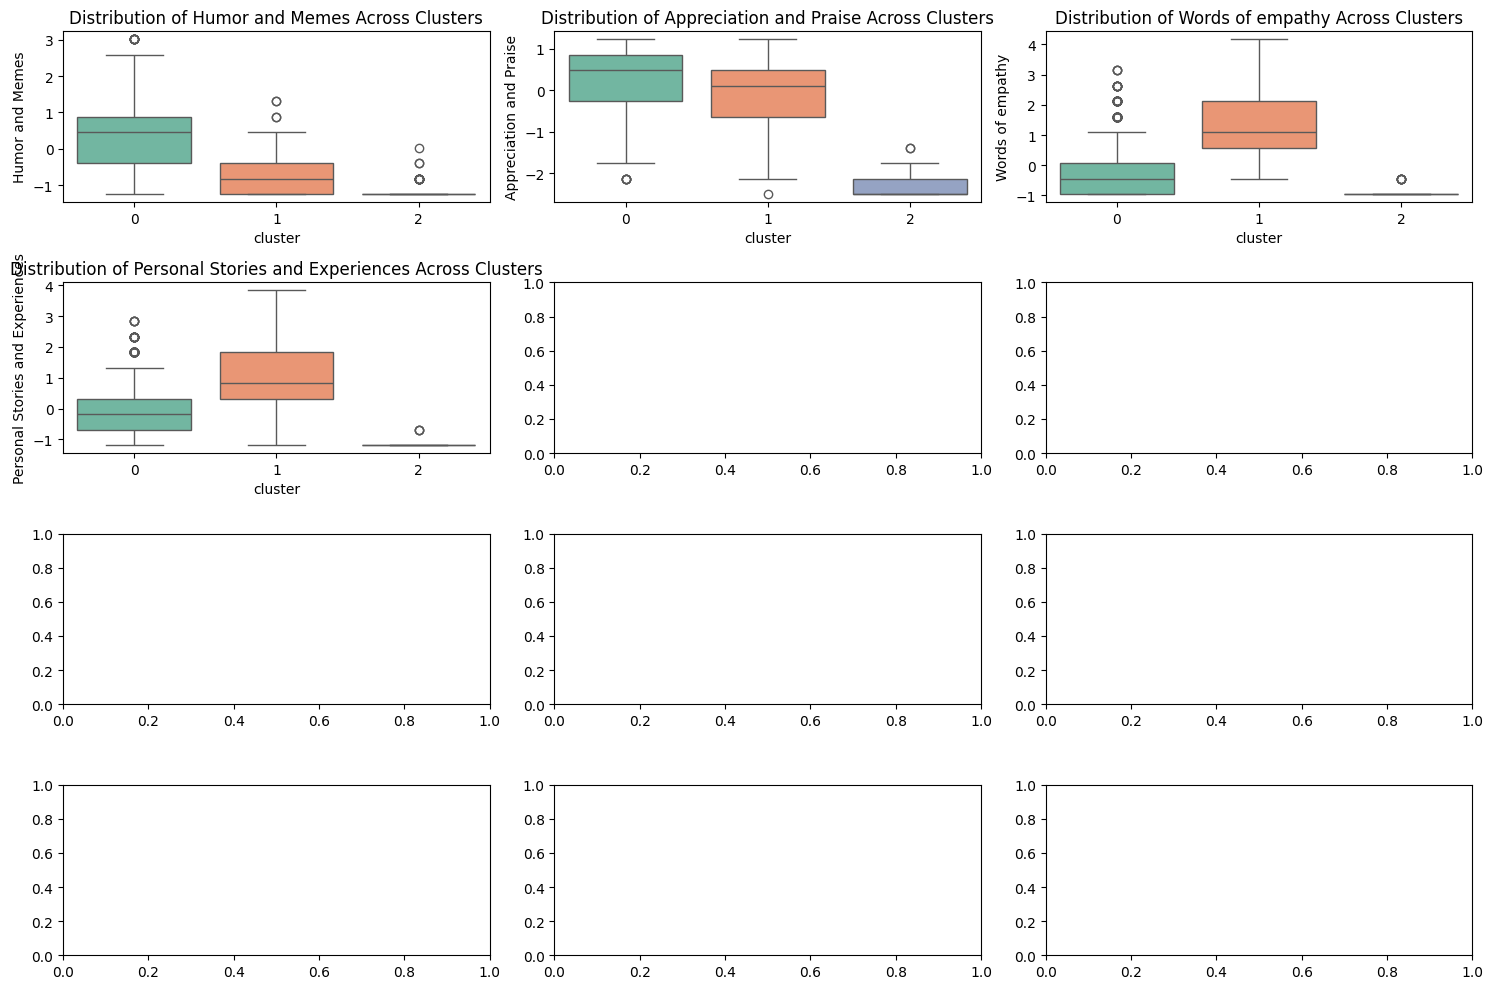

In [18]:
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
for idx, feature in enumerate(comment_categories):  # 상위 6개 feature만 시각화
    sns.boxplot(x="cluster", y=feature, data=X_scaled_df, ax=axes[idx//3, idx%3], palette="Set2")
    axes[idx//3, idx%3].set_title(f"Distribution of {feature} Across Clusters")
plt.tight_layout()
plt.show()

In [21]:
X_scaled_df.cluster.unique()

array([0, 1, 2])

In [23]:
id_column = df_final_aggregated['spotify_id']
X_scaled_df['spotify_id'] = id_column


In [24]:
X_scaled_df.to_csv( "x_scaled_df_comments.csv" )

In [19]:
# Save the scaler object to a file
joblib.dump(scaler, 'scaler_comments.pkl')


['scaler_comments.pkl']